In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data/advertising.csv", index_col="id")

In [3]:
X = df[["tv", "radio", "newspaper"]]
y = df["sales"].values

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
ccp_alphas = tree.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]

In [ ]:
model = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), scoring="neg_mean_squared_error", param_grid={
    "ccp_alpha": ccp_alphas
})



In [7]:
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.78956126e-16, 1.51582450e-15, 3.33333333e-05,
       3.33333333e-05, 3.33333333e-05, 3.33333333e-05, 3.33333333e-05,
       3.33333333e-05, 3.33333333e-05, 3.33333333e-05, 3.33333333e-05,
       3.33333333e-05, 3.33333333e-05, 3.33333333e-05, 3.33333333e-05,
       3.33333333e-05, 1....
       3.30687831e-02, 3.40071429e-02, 3.46722222e-02, 3.93361111e-02,
       6.20608437e-02, 6.25000000e-02, 7.40953602e-02, 7.55942313e-02,
       8.29352814e-02, 9.24732571e-02, 1.19537778e-01, 1.56433333e-01,
       2.08542937e-01, 3.04094706e-01, 3.65223785e-01, 3.72627692e-01,
       3.80733791e-01, 5.11376938e-01, 6.47710565e-01, 1.46205000e+00,
       1.68178305e+00, 7.27025365e+00, 1.22248642e+01])},
             scoring='neg_mean_squared_error')

In [8]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [9]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print(train_mse)
print(test_mse)

0.10319438746438746
2.2051691128643442


In [10]:
best_tree = model.best_estimator_

[Text(0.3954326923076923, 0.95, 'tv <= 108.6\nsquared_error = 26.78\nsamples = 150\nvalue = 14.305'),
 Text(0.1778846153846154, 0.85, 'tv <= 32.75\nsquared_error = 8.044\nsamples = 50\nvalue = 9.36'),
 Text(0.28665865384615385, 0.8999999999999999, 'True  '),
 Text(0.07051282051282051, 0.75, 'newspaper <= 9.0\nsquared_error = 3.873\nsamples = 20\nvalue = 6.795'),
 Text(0.02564102564102564, 0.65, 'tv <= 2.4\nsquared_error = 1.707\nsamples = 3\nvalue = 3.2'),
 Text(0.01282051282051282, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 1.6'),
 Text(0.038461538461538464, 0.55, 'radio <= 6.85\nsquared_error = 0.64\nsamples = 2\nvalue = 4.0'),
 Text(0.02564102564102564, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 4.8'),
 Text(0.05128205128205128, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.11538461538461539, 0.65, 'radio <= 23.7\nsquared_error = 1.573\nsamples = 17\nvalue = 7.429'),
 Text(0.08974358974358974, 0.55, 'tv <= 17.95\nsquared_error = 0.577\nsamples = 9\nvalu

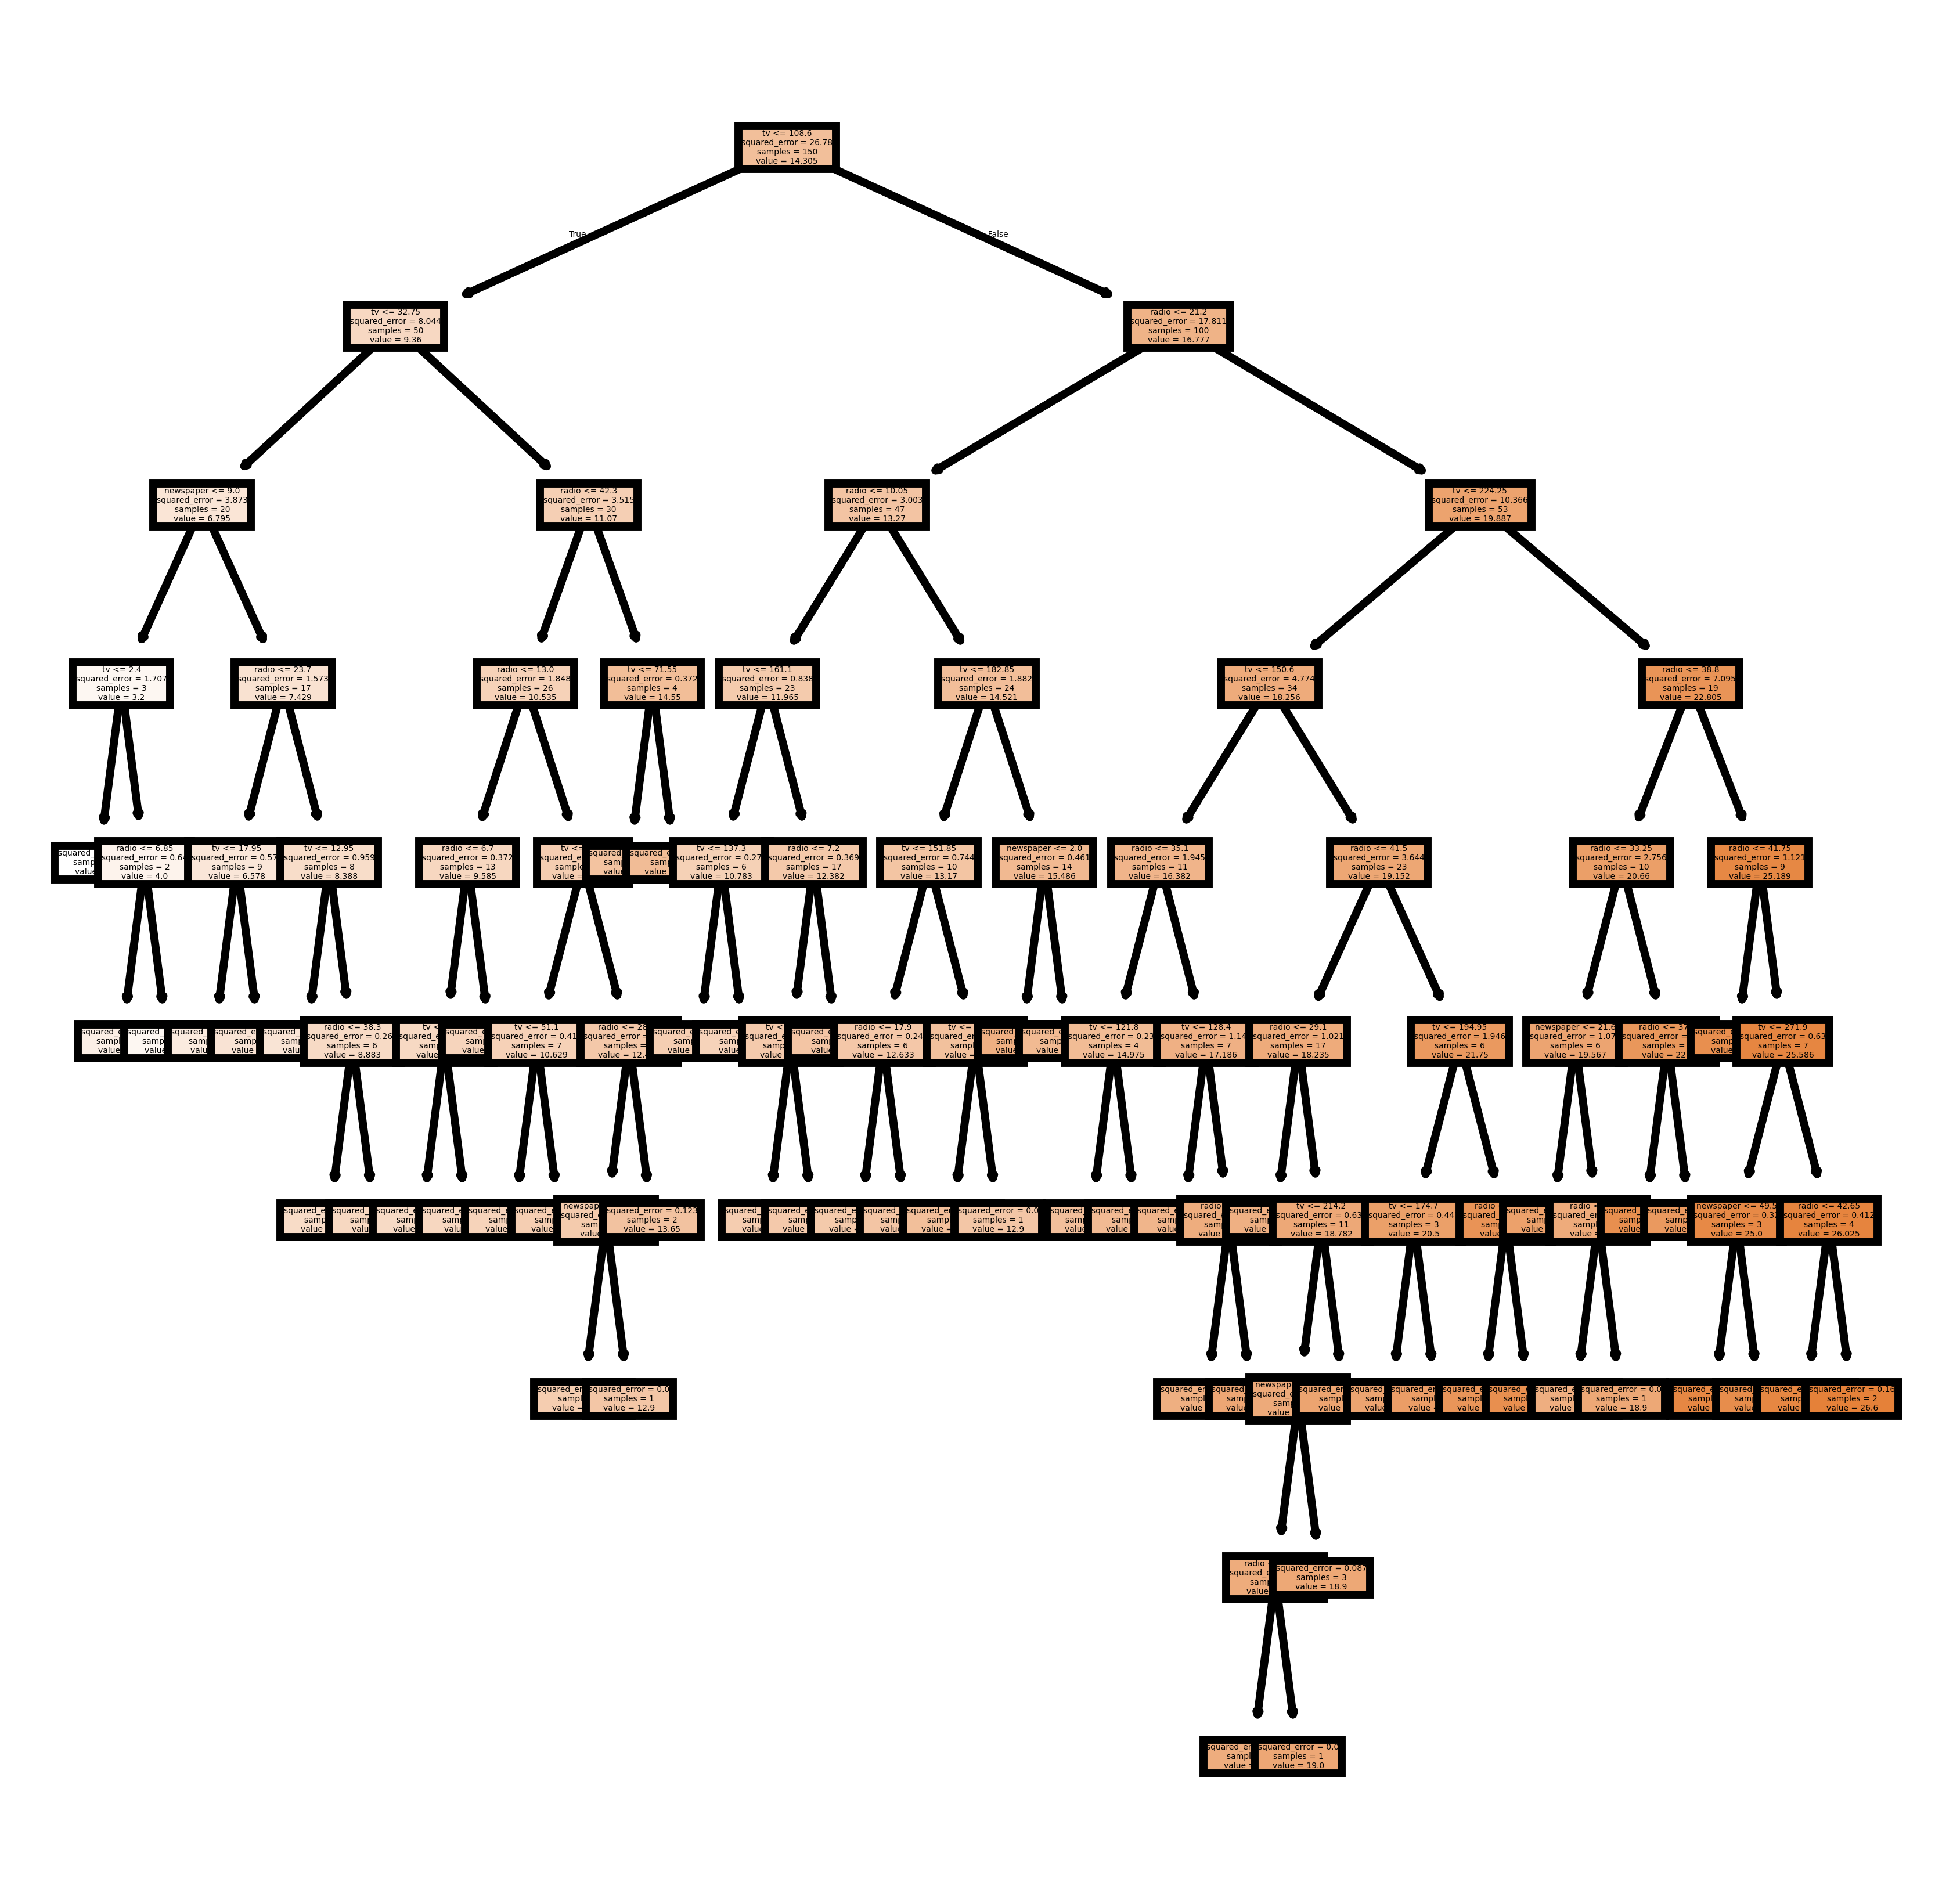

In [11]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(best_tree, feature_names=X.columns, filled=True)

In [12]:
best_tree.feature_importances_

array([0.61568911, 0.36979621, 0.01451469])

In [13]:
X.columns

Index(['tv', 'radio', 'newspaper'], dtype='object')

In [14]:
best_tree.get_depth()

9

In [15]:
best_tree.get_n_leaves()

53